<a href="https://colab.research.google.com/github/rchang18/MAT-241/blob/main/Final_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction to the Problem
Accurately collecting data is a critical challenge in engineering systems, particularly for temperature tracking. Temperature monitoring plays a vital role in applications ranging from medical devices such as thermometers to large-scale climate agreements like the Paris Agreement. While highly accurate measurement systems exist, they are often prohibitively expensive. Engineers must balance manufacturing costs with equipment accuracy when designing systems. In situations where continuous data collection is limited, estimating missing values becomes essential. For instance, if a measurement tool only records data every 30 seconds, estimating the temperature at the 15-second mark can improve data accuracy without additional hardware costs. These estimations must be as precise as possible to ensure the system functions as intended. For this research paper, I will use Lagrange Interpolation and Spline Interpolation to estimate missing temperature values and compare the results with Polynomial Regression for accuracy assessment.
#2. Proposed Methodology/Models
Lagrange Interpolation fits a single polynomial through all given data points to estimate unknown or intermediate values. Its mathematical form is defined as:

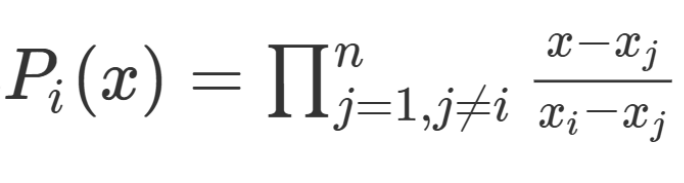

Spline Interpolation, on the other hand, fits distinct cubic functions between each pair of given data points to ensure smooth transitions.The constraints for these smooth transitions are:
 1. The cubic function intersects the data points on the left and right
 2. The splines have continuous 1st and 2nd derivatives
 3. The 2nd derivatives are zero at the endpoints (this one is arbitrary)
 This method is particularly effective for complex data patterns. Its mathematical form is given by:

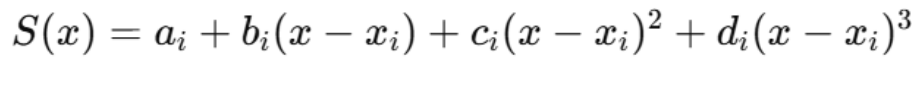

Polynomial Regression also fits a polynomial curve to the data but does not necessarily pass through each point like Lagrange Interpolation. Its general form is:

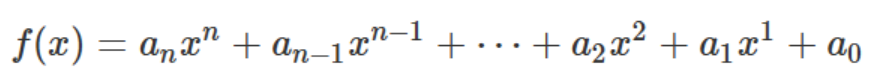

Using a given data set of temperature values, these three methods will be applied to estimate points of interest that were not directly measured. Interpolation and regression methods are widely used for fitting models to discrete data sets, making them suitable for temperature estimation.

#3. Data Set
The dataset used in this study consists of global monthly temperature deviations from a set mean from the years 1850 to 2022. For the experiment, data from the years 2000 to 2022 will be utilized while deliberately excluding the year 2015.
The three methods (Lagrange Interpolation, Spline Interpolation, and Polynomial Regression) will be applied to the available temperature data to construct predictive models. The models will then be used to estimate the temperature values for the excluded year 2015. The estimated values for 2015 will be compared against the actual recorded values using the absolute error formula below:

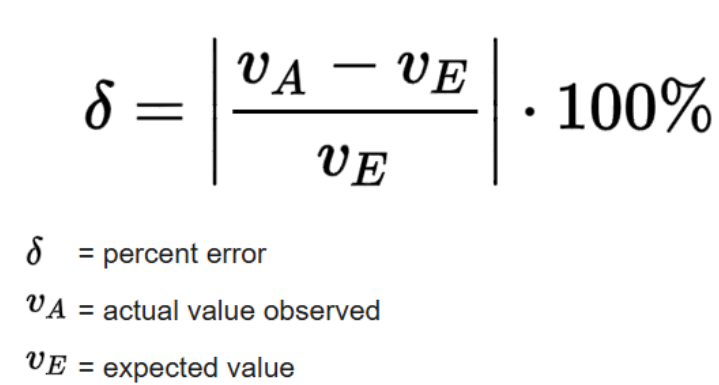

#4. Implementation
The expected result for the year 2015 deviation from the mean is 0.8975oC. In the code, the years are labeled 0 - 20, with the year 0 being 2000 and so on. The mean for each year is the deviation from 0oC.

#Lagrange Interpolation

Lagrange Estimated Year 15 mean = 1.1057863241696138
Lagrange Error = 18.836037272031344


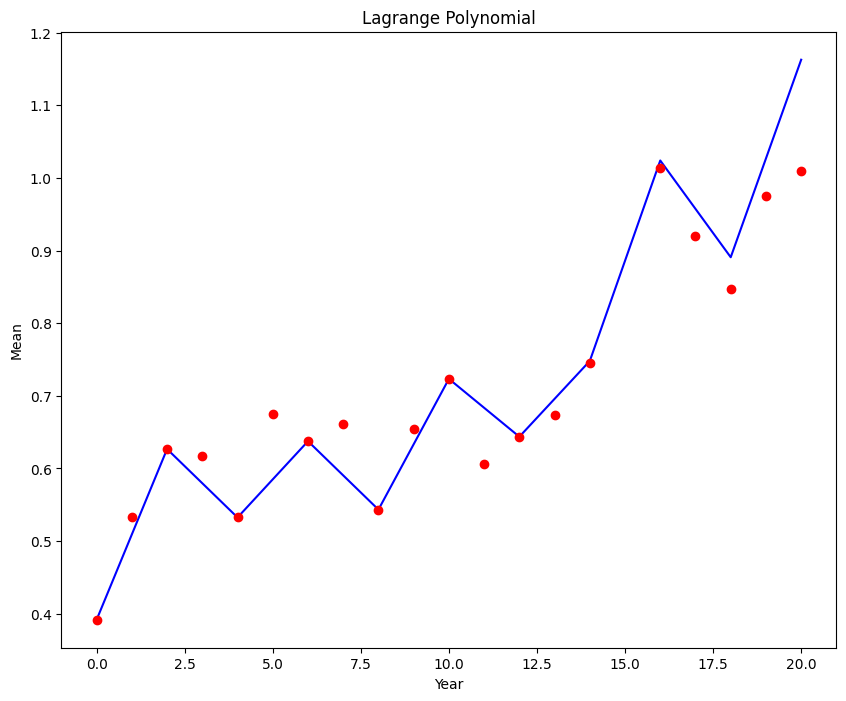

In [64]:
from scipy.interpolate import lagrange
f = lagrange(Year, Mean)
x_new = np.linspace(0,20,11)
y_new=f(x_new)
Lagrange_Error = abs((0.8975-f(15))/f(15))*100
print(f'Lagrange Estimated Year 15 mean = {f(15)}')
print(f'Lagrange Error = {Lagrange_Error}')
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', Year, Mean, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.show()

Looking at lagrange interpolation, the calculated result for the year 2015 is 1.1 degrees celsius. This comes with an error of 18.8%.


#Cubic Spline

Spline Estimated Year 15 mean = 0.9127301109122183
Cubic Spline Error = 1.668632461023643


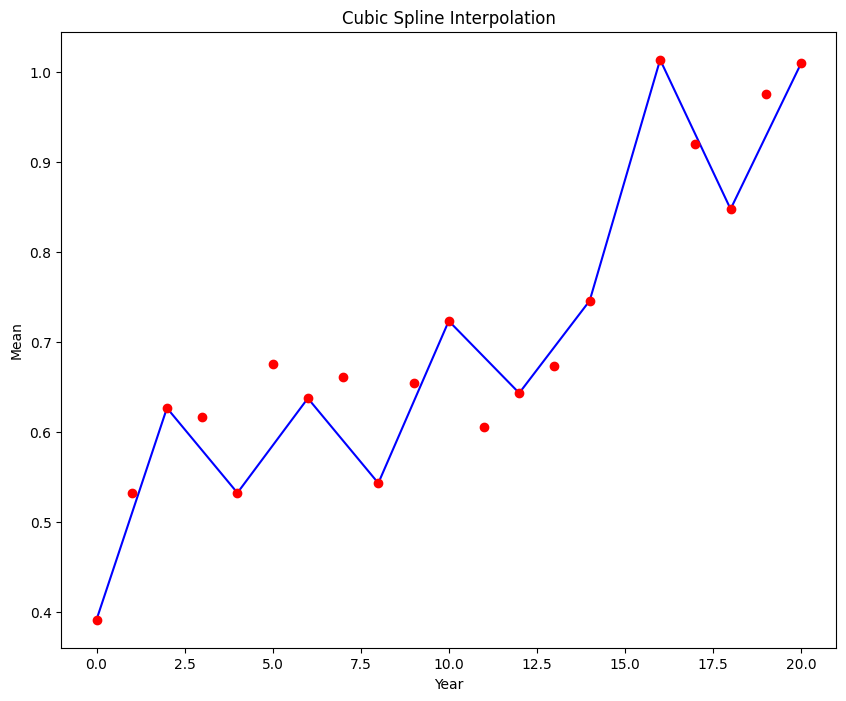

In [65]:
from scipy.interpolate import CubicSpline
f = CubicSpline(Year, Mean, bc_type='natural')
x_new = np.linspace(0, 20, 11)
y_new = f(x_new)
Spline_Error = abs((0.8975-f(15))/f(15))*100
print(f'Spline Estimated Year 15 mean = {f(15)}')
print(f'Cubic Spline Error = {Spline_Error}')
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(Year, Mean, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.show()


Looking at spline interpolation, the calculated result for the year 2015 is 0.91 degrees celsius. This comes with an error of 1.67%.


# Polynomial Regression

Poly Estimated Year 15 Mean = 0.8960117700397725
Polynomial Regression Error = 0.16609491191855666


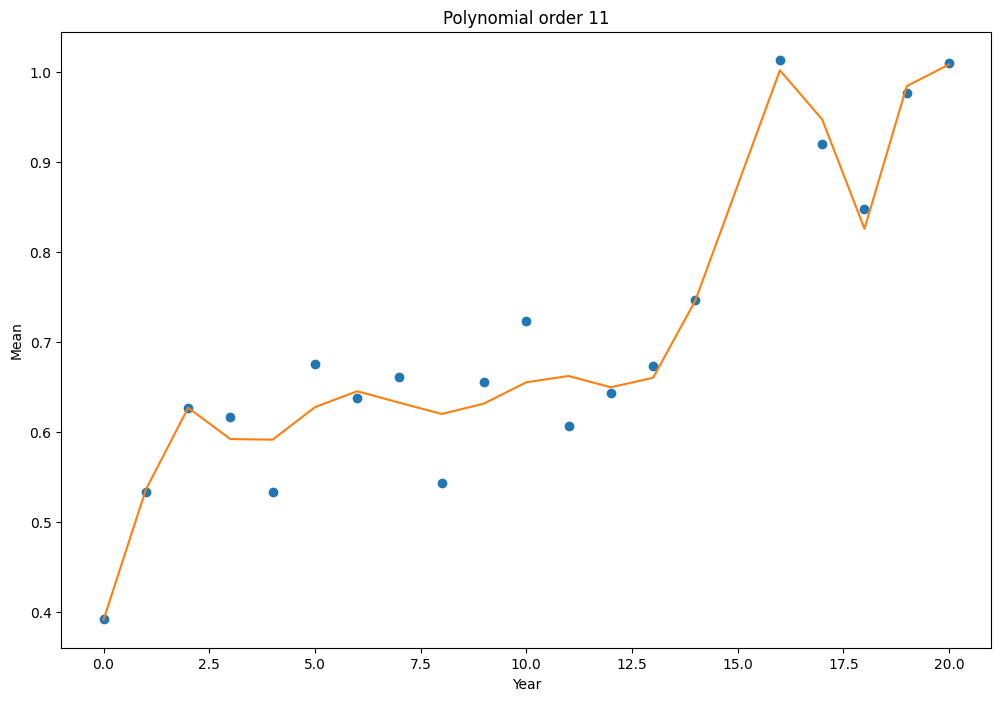

In [66]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Year = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20])
Mean = np.array([0.3917, 0.5325, 0.6267, 0.6167, 0.5325, 0.675, 0.6375, 0.6608, 0.5433, 0.655, 0.7233, 0.6058, 0.6433, 0.6733, 0.7458, 1.0133, 0.92, 0.8475, 0.9758, 1.0092])

plt.figure(figsize = (12, 8))
j=11;
y_est = np.polyfit(Year, Mean, j)
Poly_Error = abs((0.8975-np.polyval(y_est, 15))/np.polyval(y_est, 15))*100
plt.plot(Year, Mean, 'o')
plt.plot(Year, np.polyval(y_est, Year))
plt.title(f'Polynomial order {j}')
plt.xlabel('Year')
plt.ylabel("Mean")
print(f'Poly Estimated Year 15 Mean = {np.polyval(y_est, 15)}')
print(f'Polynomial Regression Error = {Poly_Error}')

Looking at polynmoial regression, the calculated result for the year 2015 is 0.89 degrees celsius. This comes with an error of 0.17%.

#Comparing Results

Based on the methodologies used here, polynomial regression had the least amount of error while lagrange had the most. The difference in accuracy between polynomial regression and spline interpolation is only 1% so they are relatively similar. Lagrange was expected to perform the worst as it only fits a single polynomial to the entire data set. On the other hand polynomial regression and spline interpolation are composed of many functions to more accurately reflect the data set.

#5. References
Dalal, D. K., & Zickar, M. J. (2011). Some Common Myths About Centering Predictor Variables in Moderated Multiple Regression and Polynomial Regression. Organizational Research Methods, 15(3), 339-362. https://doi-org.ezproxy1.lib.asu.edu/10.1177/1094428111430540 (Original work published 2012)

Datopian. “Global Temperature Time Series.” DataHub, datahub.io/core/global-temp.

Python Numerical Methods. Berkeley.edu, 2020, pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.html?highlight=polynomial%20regression.

Sushmita Sharma, Apu Kumar Saha, Sanjoy Chakraborty et al. Quadratic and Lagrange interpolation based butterfly optimization algorithm by for numerical optimization and engineering design problem, 21 August 2023, PREPRINT (Version 1) available at Research Square [https://doi.org/10.21203/rs.3.rs-3248693/v1]
